In [1]:
import numpy as np
import pandas as pd

In [3]:
train = np.load ('train.npy')
test = np.load ('test.npy')

In [4]:

# Importando el arbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

modelo = DecisionTreeClassifier(criterion='entropy', max_depth=5) # Creando el modelo


In [19]:
y_prds = list()
y_test2 = list()
for i in range(len(train)):
    x_train = pd.DataFrame(train[i])
    x_test = pd.DataFrame(test[i])

    y_train = np.array(["carton"]*int(train[i].shape[0]/3) +  ["plastico"]*int(train[i].shape[0]/3) +  ["cristal"]*int(train[i].shape[0]/3))
    y_test = np.array(["carton"]*int(test[i].shape[0]/3) +  ["plastico"]*int(test[i].shape[0]/3) +  ["cristal"]*int(test[i].shape[0]/3))
    y_test2 = np.concatenate((y_test2, y_test), axis=0)
    modelo.fit(x_train,y_train)
    y_prds_test = modelo.predict(x_test)
    y_prds_train = modelo.predict(x_train)
    print("precisión del modelo: {0: .2f}".format((y_train == modelo.predict(x_train)).mean()))
    y_prds = np.concatenate((y_prds, modelo.predict(x_test)), axis=0)
    

precisión del modelo:  0.84
precisión del modelo:  0.77
precisión del modelo:  0.73
precisión del modelo:  0.81
precisión del modelo:  0.72
precisión del modelo:  0.85
precisión del modelo:  0.81
precisión del modelo:  0.81
precisión del modelo:  0.74
precisión del modelo:  0.78


In [11]:
# verificando la precisión
print("precisión del modelo: {0: .2f}".format((y_train == modelo.predict(x_train)).mean()))

precisión del modelo:  0.78


In [12]:
comp = pd.DataFrame({'real' : y_test2 , 'preds' : y_prds })
comp

,real,preds
0,carton,carton
1,carton,plastico
2,carton,carton
3,carton,carton
4,carton,carton
...,...,...
295,cristal,plastico
296,cristal,cristal
297,cristal,cristal
298,cristal,plastico


In [17]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test2, y_prds)
print("Precisión:", accuracy)

Precisión: 0.5333333333333333


In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import itertools  

In [14]:
cm = confusion_matrix(y_test2, y_prds)
cm #[carton, cristal, plastico]

array([[50, 18, 32],
       [27, 46, 27],
       [17, 19, 64]], dtype=int64)

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[50 18 32]
 [27 46 27]
 [17 19 64]]


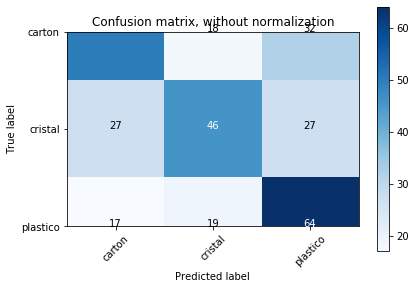

In [16]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes= ["carton","cristal","plastico"],
                      title='Confusion matrix, without normalization')